# Basic Logistic Regression

Vamos a considerar los datos de [Kaggle](https://www.kaggle.com/c/tabular-playground-series-jun-2021/code?competitionId=26480), para ajustar un modelo de regresión logística que haga predicciones sobre la categoría.

Ideas para este ajuste son de [aquí](https://www.kaggle.com/whenthetidegoesout/june-playground).

## Bibliotecas básicas

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import random


from sklearn.linear_model import LogisticRegression

## Carga de datos
Para ejecutar este comando es necesario dar la ubicación del archivo `train.csv`

In [2]:
dataf = pd.read_csv('tabular-playground-series-jun-2021/train.csv')
dataf

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0,1,6,0,1,32,0,6,0,...,0,1,1,0,0,0,4,1,0,Class_6
199996,199996,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6
199997,199997,1,2,0,0,0,2,0,1,8,...,1,0,1,1,1,0,1,0,0,Class_8
199998,199998,0,0,2,0,2,1,0,0,3,...,0,0,3,2,1,0,0,1,0,Class_7


## Análisis básico

In [3]:
dataf.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [4]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 77 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  int64 
 1   feature_0   200000 non-null  int64 
 2   feature_1   200000 non-null  int64 
 3   feature_2   200000 non-null  int64 
 4   feature_3   200000 non-null  int64 
 5   feature_4   200000 non-null  int64 
 6   feature_5   200000 non-null  int64 
 7   feature_6   200000 non-null  int64 
 8   feature_7   200000 non-null  int64 
 9   feature_8   200000 non-null  int64 
 10  feature_9   200000 non-null  int64 
 11  feature_10  200000 non-null  int64 
 12  feature_11  200000 non-null  int64 
 13  feature_12  200000 non-null  int64 
 14  feature_13  200000 non-null  int64 
 15  feature_14  200000 non-null  int64 
 16  feature_15  200000 non-null  int64 
 17  feature_16  200000 non-null  int64 
 18  feature_17  200000 non-null  int64 
 19  feature_18  200000 non-

In [5]:
dataf.isna().sum()

id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
             ..
feature_71    0
feature_72    0
feature_73    0
feature_74    0
target        0
Length: 77, dtype: int64

Tenemos que:
    - Todas las columnas de variables `X` son numéricas
    - La columna `y` es del tipo `object`
    - No tenemos nulos
    
Ahora analicemos el número de observaciones por categoría

target
Class_1     9118
Class_2    24431
Class_3    14798
Class_4     4704
Class_5     3064
Class_6    51811
Class_7    14769
Class_8    51763
Class_9    25542
Name: id, dtype: int64

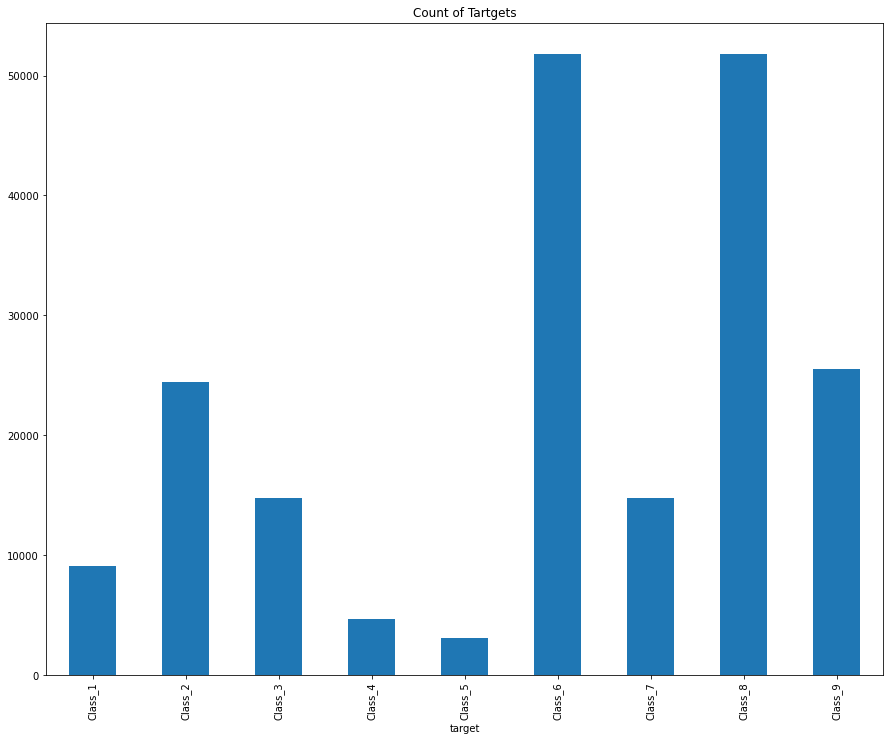

In [6]:
viz_a = dataf.groupby('target').count()['id']
viz_a.plot(kind='bar', title='Count of Tartgets', figsize=(15, 12))
dataf.groupby('target').count()['id']

## Mini sample y Separación train/test
Tenemos `200000` renglones, así que para agilizar los cálculos usaremos una mini muestra de los datos

In [17]:
dataf = pd.read_csv('tabular-playground-series-jun-2021/train.csv')
size_of_mini_sample = 5000
dataf = dataf.sample(n=size_of_mini_sample, random_state=42) # también se podría usar una fracción con `frac=0.4`

In [18]:
y = dataf.target
X = dataf.drop('target', axis='columns')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
    
print("Train f1 Score: ",f1_score(y_train, y_pred_train,average='micro'))
print("Test f1 Score: ",f1_score(y_test, y_pred_test,average='micro'))
print(classification_report(y_test, y_pred_test))

Train f1 Score:  0.35813333333333336
Test f1 Score:  0.2712
              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00        54
     Class_2       0.22      0.47      0.30       159
     Class_3       0.12      0.04      0.06        95
     Class_4       0.00      0.00      0.00        34
     Class_5       0.00      0.00      0.00        17
     Class_6       0.31      0.49      0.38       319
     Class_7       0.00      0.00      0.00       101
     Class_8       0.32      0.30      0.31       318
     Class_9       0.19      0.06      0.09       153

    accuracy                           0.27      1250
   macro avg       0.13      0.15      0.13      1250
weighted avg       0.22      0.27      0.23      1250



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'dim' is not defined

Maximum accuracy:- 0.2976 at K = 37


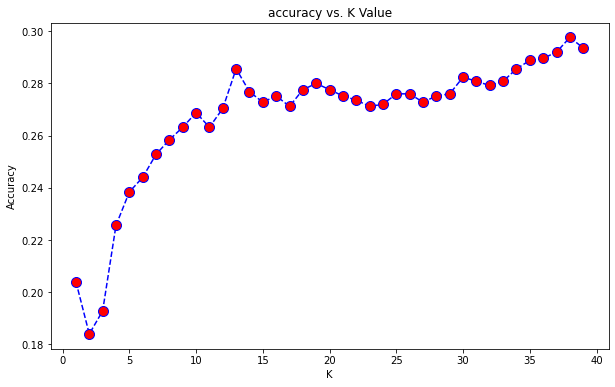

In [20]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.3064 at K = 27


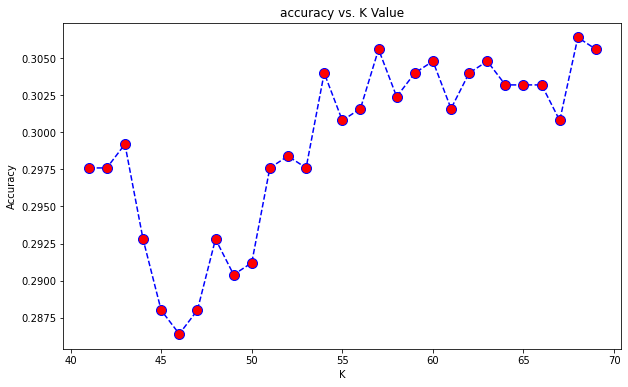

In [21]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(41,70):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(41,70),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# Logistic regression


In [41]:
dataf = pd.read_csv('tabular-playground-series-jun-2021/train.csv')
# size_of_mini_sample = 10000
# dataf = dataf.sample(n=size_of_mini_sample, random_state=42) # también se podría usar una fracción con `frac=0.4`
y = dataf.target
X = dataf.drop('target', axis='columns')


In [37]:
y

0         Class_6
1         Class_6
2         Class_2
3         Class_8
4         Class_2
           ...   
199995    Class_6
199996    Class_6
199997    Class_8
199998    Class_7
199999    Class_8
Name: target, Length: 200000, dtype: object

In [38]:
X

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,6,1,0,0,0,0,7,...,3,0,0,0,0,0,0,2,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,1,0,3,0,...,8,0,0,0,0,1,0,0,0,0
3,3,0,0,7,0,1,5,2,2,0,...,0,0,4,0,2,2,0,4,3,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0,1,6,0,1,32,0,6,0,...,1,0,1,1,0,0,0,4,1,0
199996,199996,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199997,199997,1,2,0,0,0,2,0,1,8,...,4,1,0,1,1,1,0,1,0,0
199998,199998,0,0,2,0,2,1,0,0,3,...,0,0,0,3,2,1,0,0,1,0


In [44]:

#X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

print("Train f1 Score: ",f1_score(y_train, y_pred_train,average='micro'))
print("Test f1 Score: ",f1_score(y_test, y_pred_test,average='micro'))
print(classification_report(y_test, y_pred_test))





Accuracy of logistic regression classifier on test set: 0.29
Train f1 Score:  0.29268666666666665
Test f1 Score:  0.2915


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00      2262
     Class_2       0.00      0.00      0.00      6141
     Class_3       0.00      0.00      0.00      3692
     Class_4       0.00      0.00      0.00      1206
     Class_5       0.00      0.00      0.00       785
     Class_6       0.27      0.55      0.36     12916
     Class_7       0.00      0.00      0.00      3742
     Class_8       0.31      0.58      0.41     12991
     Class_9       0.00      0.00      0.00      6265

    accuracy                           0.29     50000
   macro avg       0.06      0.13      0.09     50000
weighted avg       0.15      0.29      0.20     50000



Train f1 Score:  0.3253333333333333
Test f1 Score:  0.24
              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00        20
     Class_2       0.18      0.57      0.27        61
     Class_3       0.12      0.06      0.08        32
     Class_4       0.00      0.00      0.00         9
     Class_5       0.00      0.00      0.00         8
     Class_6       0.29      0.38      0.33       130
     Class_7       0.00      0.00      0.00        50
     Class_8       0.33      0.25      0.29       123
     Class_9       0.13      0.03      0.05        67

    accuracy                           0.24       500
   macro avg       0.12      0.14      0.11       500
weighted avg       0.20      0.24      0.20       500



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train f1 Score:  0.35
Test f1 Score:  0.27
              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00        20
     Class_2       0.19      0.49      0.28        61
     Class_3       0.17      0.09      0.12        32
     Class_4       0.00      0.00      0.00         9
     Class_5       0.00      0.00      0.00         8
     Class_6       0.33      0.47      0.39       130
     Class_7       0.25      0.02      0.04        50
     Class_8       0.31      0.32      0.32       123
     Class_9       0.08      0.01      0.03        67

    accuracy                           0.27       500
   macro avg       0.15      0.16      0.13       500
weighted avg       0.23      0.27      0.23       500



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pca = PCA(n_components=74)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
# Calculate cumulative explained variance across all PCs
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,75), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [ ]:
# Se cargan las librerías que se van a utilizar en ambos ejemplos
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline


from sklearn.preprocessing import PolynomialFeatures  # <------ library to perform Polynomial Regression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

pd.set_option('display.max_rows', 90) # by default is 10, if change to None print ALL
pd.set_option('display.max_columns', 90) # by default is 10, if change to None print ALL

In [ ]:
## 1) EXTRAER DATOS
# Los datos pueden encontrarse en diferentes formatos, en nuestro caso están en formato csv.

# Se carga la base de datos
train = pd.read_csv('train.csv') #Se encuentra en la misma carpeta que el jupyter notebook
test = pd.read_csv('test.csv') #Se encuentra en la misma carpeta que el jupyter notebook
print(train.shape) 
print(test.shape) 
train

# Eliminate of some columns 

Veamos a eleminar las columnas que tienen más del 50% de sus valores como nulas en train

In [ ]:
col_plus_50percent_null = train.isnull().sum()[train.isnull().sum()>train.shape[0]/2]
col_plus_50percent_null

Observemos que también hay casi las mismas columnas en test 

In [ ]:
test.isnull().sum()[test.isnull().sum()>test.shape[0]/2]

Entonces nos queda 

In [ ]:
features_drop = ['PoolQC','MiscFeature','Alley','Fence']
train = train.drop(features_drop, axis=1)
test  =  test.drop(features_drop, axis=1)  

Comprovemos que ya no tenemos esas variables

In [ ]:
col_plus_50percent_null = train.isnull().sum()[train.isnull().sum()>train.shape[0]/2]
col_plus_50percent_null

In [ ]:
test.isnull().sum()[test.isnull().sum()>test.shape[0]/2]

# Separación de variables

Separemos las variables en `X_train`, `X_test`, `y_train`, `y_test`, al igual que elijamos que columnas son numericas, ordinales y nominales

In [ ]:

numerical = train.select_dtypes(include=np.number).columns.tolist()
numerical.remove('Id')
numerical.remove('SalePrice')

nominal = train.select_dtypes(exclude=np.number).columns.tolist()

# ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
#           "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
#           "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

ordinal = []

X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

X_REAL_test = test[nominal + ordinal + numerical]

# Pipelines auxiliares

Para separar mejor el procesamiento de nuestros datos, utilizamos tres pipelines auxiliares

In [ ]:
# Pipeline datos ordinales
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

# Pipeline datos nominales
nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

# Pipeline datos numéricos
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pegado de los tres pipelines
preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])


Finalmente agregamos todo en un solo pipeline

In [ ]:
# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)

# ML_model = Lasso(alpha=190)
# ML_model = Ridge(alpha=20)
ML_model = LinearRegression()

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", ML_model)
])

In [ ]:
complete_pipeline

# Predicciones

In [ ]:
complete_pipeline.fit(X_train, y_train)
y_pred = complete_pipeline.predict(X_test)

print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score:', r2_score(y_test, y_pred)) 

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.scatter(y_test,y_pred)

# Generación de archivo para Kaggle

In [ ]:
y_REAL_test = complete_pipeline.predict(X_REAL_test)

pred=pd.DataFrame(y_REAL_test)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

Para subir el archivo es [aquí](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation)

In [ ]:
# FUNCIONA PIPELINE LASSO WITH 

numerical = train.select_dtypes(include=np.number).columns.tolist()
numerical.remove('Id')
numerical.remove('SalePrice')

nominal = train.select_dtypes(exclude=np.number).columns.tolist()

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

ordinal = []


X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


ML_model = Lasso(alpha=1)
ML_model = Ridge(alpha=.1)
# ML_model = LinearRegression()

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
#     ("scaler", StandardScaler()), # No mejora la estimación escalando
#     ('poly_features', PolynomialFeatures(degree=2)), # empeora con polynomal features
    ("estimator", ML_model)
])


complete_pipeline.fit(X_train, y_train)

y_pred = complete_pipeline.predict(X_test)

print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.scatter(y_test,y_pred)


# ALL IN ONE

In [ ]:
# FUNCIONA PIPELINE LASSO WITH 

numerical = train.select_dtypes(include=np.number).columns.tolist()
numerical.remove('Id')
numerical.remove('SalePrice')

nominal = train.select_dtypes(exclude=np.number).columns.tolist()

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

ordinal = []


X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


ML_model = Lasso(alpha=190)
ML_model = LinearRegression()

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
#     ("scaler", StandardScaler()), # No mejora la estimación escalando
#     ('poly_features', PolynomialFeatures(degree=2)),
    ("estimator", LinearRegression())
])


complete_pipeline.fit(X_train, y_train)


y_pred = complete_pipeline.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.scatter(y_test,y_pred)


In [ ]:
aux = ct.fit_transform(X)
aux = pd.df(aux)

In [ ]:

preprocessed_features = preprocessing_pipeline.fit_transform(X_train)
preprocessed_features

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(preprocessing_pipeline.fit_transform(X_train),y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

# Encontrando alpha de Lasso (alpha = 180)

In [ ]:
parameters={'alpha':[100,150,170,180,190,200,220,250,300]}
ML_model=Lasso()
grid = GridSearchCV(ML_model,parameters,scoring='neg_mean_squared_error',cv=5)
grid.fit(preprocessing_pipeline.fit_transform(X_train),y_train)
# Convert the results of CV into a dataframe
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score')

# Encontrando alpha de Ridge (alpha = 20)

In [ ]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300]}
ML_model=Ridge()
grid = GridSearchCV(ML_model,parameters,scoring='neg_mean_squared_error',cv=5)
grid.fit(preprocessing_pipeline.fit_transform(X_train),y_train)
# Convert the results of CV into a dataframe
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score')

## Numeric missing values 

# One Hot Encoder

In [ ]:
model

In [ ]:
# https://salvatore-raieli.medium.com/a-complete-guide-to-linear-regression-using-gene-expression-data-regularization-f980ba6b11f7


model = Lasso(alpha = 180)
model.fit(preprocessing_pipeline.fit_transform(X_train), y_train)

y_pred = complete_pipeline.predict(X_test)


coefs = model.coef_.flatten()
names = X_train.columns
genes = list(zip(names, coefs))
feature =pd.DataFrame(genes, columns = ["genes", "coefs"])
feature0 = feature.loc[(feature!=0).any(axis=1)]
feature0 = feature[(feature != 0).all(1)]
feature0.shape, feature.shape


print(feature0.shape, feature.shape)

coefs =feature0.sort_values(by=['coefs'])
plt.figure(figsize=(20, 15))
g = sns.barplot(x="genes", y="coefs", data=coefs, color= "lightblue")
g.figsize=(16,10)
plt.xticks(rotation=45)

In [ ]:
feature0

In [ ]:
# FUNCIONA LASSO

X = train[['MSSubClass', 'LotArea', 'OverallQual']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
y_pred= model_lasso.predict(X_test)


print('Predictions with Polynomial Regression')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)


In [ ]:
# LASSO PIPELINE FUNCIONA

X = train[['MSSubClass','LotArea','OverallQual','LotFrontage']]#LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

imp_mean = SimpleImputer(missing_values =np.nan, strategy='mean')

columns_imp_mean = ['LotFrontage']

scaler = StandardScaler()

column_trans = make_column_transformer(
    (imp_mean,columns_imp_mean),
    remainder = 'passthrough')


ML_model = Lasso(alpha=0.01)

pipe = make_pipeline(column_trans, ML_model)

print(cross_val_score(pipe,X_train,y_train,cv=5))
pipe.fit(X_train,y_train)


y_pred= pipe.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)

In [ ]:
# primero hace la división de cross-validation y después hace el pipeline, 
# La diferencia de hacerlo así es que entonces cuando toma promedios para calcular como llenar los missing values, 
# estos promedios son con respecto al cross-validation
cross_val_score(pipe,X,y,cv=5,scoring='accuracy').mean() 

In [ ]:
# FUNCIONA PIPELINE LASSO WITH 
nominal = ["MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood",
           "Condition1", "BldgType", "RoofStyle",
           "Foundation", "CentralAir", "SaleType", "SaleCondition"]

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

numerical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea",
            "OpenPorchSF"]

X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("scaler", StandardScaler()), # No mejora la estimación escalando
    ("estimator", LinearRegression())
])

complete_pipeline.fit(X_train, y_train)

y_pred = complete_pipeline.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)


In [ ]:
# FUNCIONA PIPELINE LASSO WITH 
nominal = ["MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood",
           "Condition1", "BldgType", "RoofStyle",
           "Foundation", "CentralAir", "SaleType", "SaleCondition"]

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

numerical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea",
            "OpenPorchSF"]

X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


from sklearn.linear_model import LinearRegression

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", LinearRegression())
])

complete_pipeline.fit(X_train, y_train)


y_pred = complete_pipeline.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)


*A general rule of thumb: drop a dummy-encoded column if using a linear-based model, and do not drop it if using a tree-based model*

In [ ]:
true_value = y_test
predicted_value = y_pred

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The next cell is from [here](https://mahmoudyusof.github.io/general/scikit-learn-pipelines/)

In [ ]:
# The next cell is from https://mahmoudyusof.github.io/general/scikit-learn-pipelines/


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## let's create a validation set from the training set

msk = np.random.rand(len(train_df)) < 0.8

val_df = train_df[~msk]

train_df = train_df[msk]


nominal = ["MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood",
           "Condition1", "BldgType", "RoofStyle",
           "Foundation", "CentralAir", "SaleType", "SaleCondition"]

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

numerical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea",
            "OpenPorchSF"]

train_features = train_df[nominal + ordinal + numerical]
train_label = train_df["SalePrice"]

val_features = val_df[nominal + ordinal + numerical]
val_label = val_df["SalePrice"]

test_features = test_df[nominal + ordinal + numerical]


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


from sklearn.compose import ColumnTransformer

# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


from sklearn.linear_model import LinearRegression

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", LinearRegression())
])


complete_pipeline.fit(train_features, train_label)






# score = complete_pipeline.score(val_features, val_label)

# print(score)

# predictions = complete_pipeline.predict(test_features)





In [ ]:
# pipe = make_pipeline(column_trans, ML_model)

# print(cross_val_score(complete_pipeline,X_train,y_train,cv=5))
# pipe.fit(X_train,y_train)


y_pred = complete_pipeline.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)

In [ ]:
# LASSO PIPELINE FUNCIONA

X = train[['MSSubClass','LotArea','OverallQual','LotFrontage']]#LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

imp_mean = SimpleImputer(missing_values =np.nan, strategy='mean')

columns_imp_mean = ['LotFrontage']

scaler = StandardScaler()

column_trans = make_column_transformer(
    (imp_mean,columns_imp_mean),
    remainder = 'passthrough')


ML_model = Lasso(alpha=0.01)

pipe = make_pipeline(column_trans, ML_model)

print(cross_val_score(pipe,X_train,y_train,cv=5))
pipe.fit(X_train,y_train)


y_pred= pipe.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)
